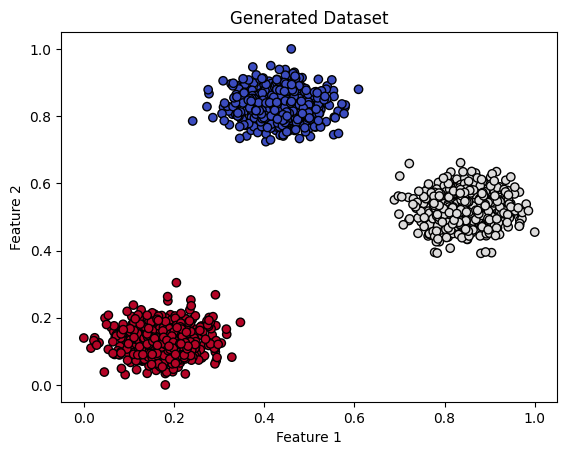

In [51]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.preprocessing import MinMaxScaler


class NeuralNetwork:
    def __init__(self):
        input_neurons = 2
        hidden_neurons1 = 64
        hidden_neurons2 = 32
        hidden_neurons3 = 16
        output_neurons = 3


        self.W_HI = np.random.randn(input_neurons, hidden_neurons1) * np.sqrt(1 / input_neurons)
        self.W_H2 = np.random.randn(hidden_neurons1, hidden_neurons2) * np.sqrt(1 / hidden_neurons1)
        self.W_H3 = np.random.randn(hidden_neurons2, hidden_neurons3) * np.sqrt(1 / hidden_neurons2)
        self.W_OH = np.random.randn(hidden_neurons3, output_neurons) * np.sqrt(1 / hidden_neurons3)


        self.B_HI = np.zeros((1, hidden_neurons1))
        self.B_H2 = np.zeros((1, hidden_neurons2))
        self.B_H3 = np.zeros((1, hidden_neurons3))
        self.B_OH = np.zeros((1, output_neurons))


        self.learning_rate = 0.01
        self.beta1 = 0.9
        self.beta2 = 0.999
        self.epsilon = 1e-8


        self.m = {}
        self.v = {}
        for param in ['W_HI', 'W_H2', 'W_H3', 'W_OH', 'B_HI', 'B_H2', 'B_H3', 'B_OH']:
            self.m[param] = np.zeros_like(getattr(self, param))
            self.v[param] = np.zeros_like(getattr(self, param))

        self.t = 0

    def relu(self, x, derivative=False):
        if derivative:
            return (x > 0).astype(float)
        return np.maximum(0, x)

    def softmax(self, x):
        exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))
        return exp_x / np.sum(exp_x, axis=1, keepdims=True)

    def feedForward(self, X):
        self.Z1 = np.dot(X, self.W_HI) + self.B_HI
        self.A1 = self.relu(self.Z1)

        self.Z2 = np.dot(self.A1, self.W_H2) + self.B_H2
        self.A2 = self.relu(self.Z2)

        self.Z3 = np.dot(self.A2, self.W_H3) + self.B_H3
        self.A3 = self.relu(self.Z3)

        self.Z4 = np.dot(self.A3, self.W_OH) + self.B_OH
        pred = self.softmax(self.Z4)
        return pred

    def backPropagation(self, X, Y, pred):
        output_error = pred - Y
        dW_OH = np.dot(self.A3.T, output_error)
        dB_OH = np.sum(output_error, axis=0, keepdims=True)

        hidden_error3 = np.dot(output_error, self.W_OH.T) * self.relu(self.Z3, derivative=True)
        dW_H3 = np.dot(self.A2.T, hidden_error3)
        dB_H3 = np.sum(hidden_error3, axis=0, keepdims=True)

        hidden_error2 = np.dot(hidden_error3, self.W_H3.T) * self.relu(self.Z2, derivative=True)
        dW_H2 = np.dot(self.A1.T, hidden_error2)
        dB_H2 = np.sum(hidden_error2, axis=0, keepdims=True)

        hidden_error1 = np.dot(hidden_error2, self.W_H2.T) * self.relu(self.Z1, derivative=True)
        dW_HI = np.dot(X.T, hidden_error1)
        dB_HI = np.sum(hidden_error1, axis=0, keepdims=True)


        gradients = {
            'W_HI': dW_HI, 'W_H2': dW_H2, 'W_H3': dW_H3, 'W_OH': dW_OH,
            'B_HI': dB_HI, 'B_H2': dB_H2, 'B_H3': dB_H3, 'B_OH': dB_OH
        }

        self.t += 1

        for param, grad in gradients.items():
            self.m[param] = self.beta1 * self.m[param] + (1 - self.beta1) * grad
            self.v[param] = self.beta2 * self.v[param] + (1 - self.beta2) * (grad ** 2)

            m_hat = self.m[param] / (1 - self.beta1 ** self.t)
            v_hat = self.v[param] / (1 - self.beta2 ** self.t)

            update = self.learning_rate * m_hat / (np.sqrt(v_hat) + self.epsilon)
            setattr(self, param, getattr(self, param) - update)

    def train(self, X, Y):
        pred = self.feedForward(X)
        self.backPropagation(X, Y, pred)


np.random.seed(42)
X, Y = make_blobs(n_samples=1500, centers=3, cluster_std=1.0, random_state=42)
scaler = MinMaxScaler()
X = scaler.fit_transform(X)


Y_one_hot = np.zeros((Y.size, Y.max() + 1))
Y_one_hot[np.arange(Y.size), Y] = 1

# Visualize Dataset
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap="coolwarm", edgecolor="k")
plt.title("Generated Dataset")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()




Epoch 0, Loss: 0.371281
Epoch 200, Loss: 0.000001
Epoch 400, Loss: 0.000001
Epoch 600, Loss: 0.000000
Epoch 800, Loss: 0.000000
Epoch 1000, Loss: 0.000000
Epoch 1200, Loss: 0.000000
Epoch 1400, Loss: 0.000000
Epoch 1600, Loss: 0.000000
Epoch 1800, Loss: 0.000000


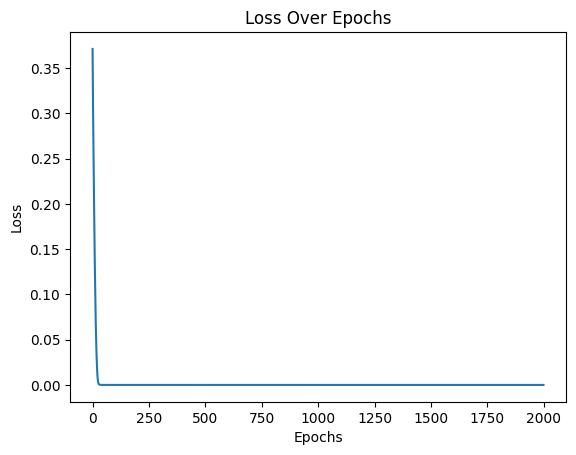

In [38]:
# Train Neural Network
NN = NeuralNetwork()
losses = []

for epoch in range(2000):
    pred = NN.feedForward(X)
    loss = np.mean(-Y_one_hot * np.log(pred + 1e-8))
    losses.append(loss)
    NN.train(X, Y_one_hot)
    if epoch % 200 == 0:
        print(f"Epoch {epoch}, Loss: {loss:.6f}")

# Loss Plot
plt.plot(losses)
plt.title("Loss Over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()



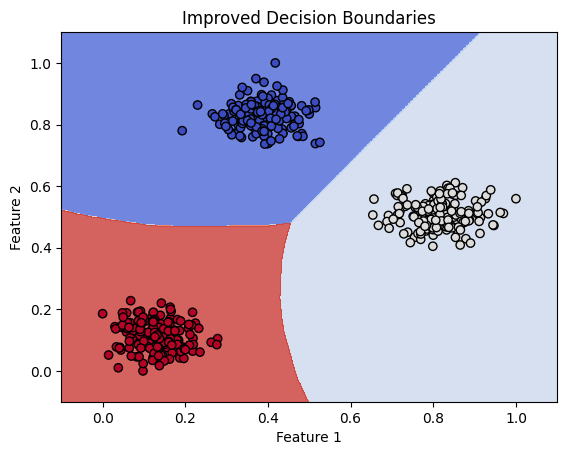

In [39]:
# Decision Boundary
x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500), np.linspace(y_min, y_max, 500))

Z = NN.feedForward(np.c_[xx.ravel(), yy.ravel()])
Z = np.argmax(Z, axis=1).reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.8, cmap="coolwarm")
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap="coolwarm", edgecolor="k")
plt.title("Improved Decision Boundaries")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()